In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = "C:/Users/ANSHIKA SHARMA/Downloads/cropped_image.png"  
img = cv2.imread(image_path)

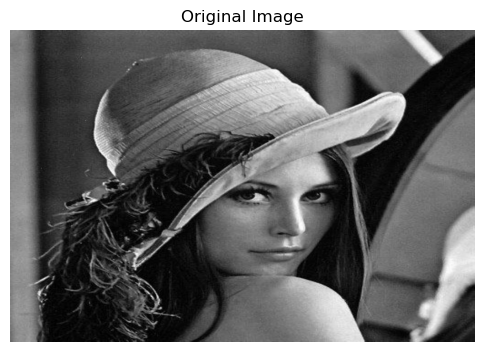

In [25]:
def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_image("Original Image", img)

In [9]:
def resize_image(img, scale_x, scale_y, interpolation_method):
    new_size = (int(img.shape[1] * scale_x), int(img.shape[0] * scale_y))
    return cv2.resize(img, new_size, interpolation=interpolation_method)

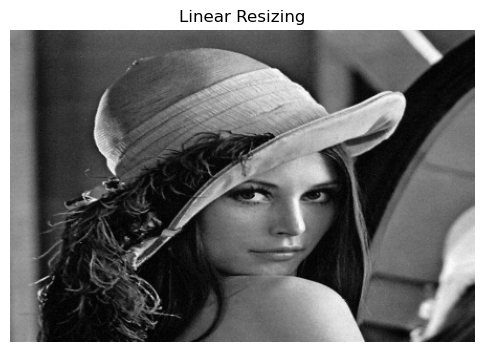

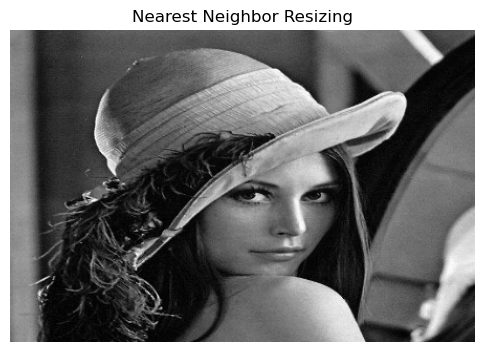

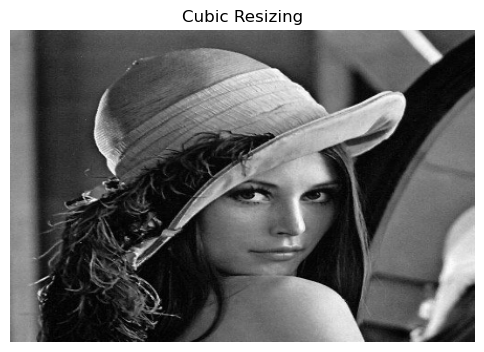

In [11]:
linear_resized = resize_image(img, 0.5, 0.5, cv2.INTER_LINEAR)
show_image("Linear Resizing", linear_resized)

nearest_resized = resize_image(img, 0.5, 0.5, cv2.INTER_NEAREST)
show_image("Nearest Neighbor Resizing", nearest_resized)

cubic_resized = resize_image(img, 0.5, 0.5, cv2.INTER_CUBIC)
show_image("Cubic Resizing", cubic_resized)

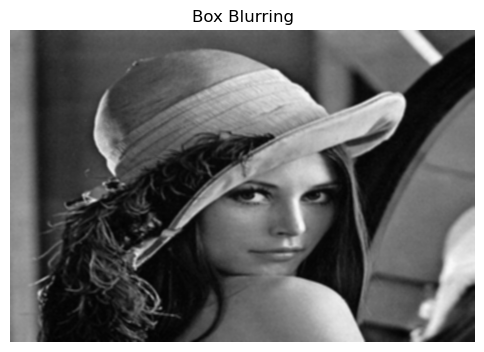

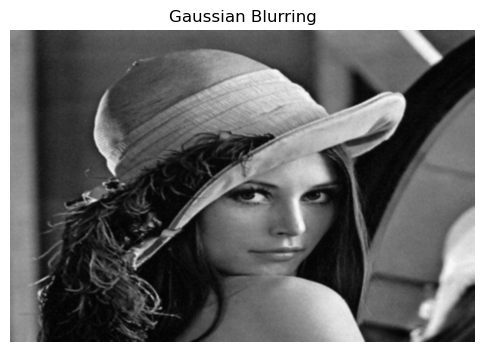

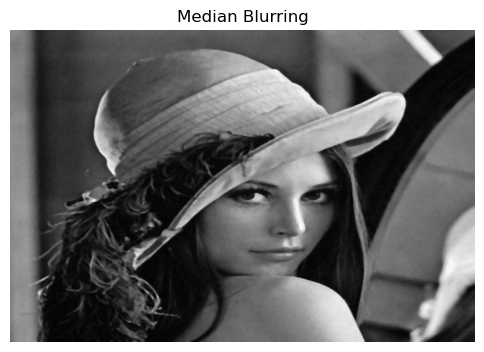

In [13]:

box_blurred = cv2.blur(img, (5, 5))
show_image("Box Blurring", box_blurred)

gaussian_blurred = cv2.GaussianBlur(img, (5, 5), 0)
show_image("Gaussian Blurring", gaussian_blurred)

median_blurred = cv2.medianBlur(img, 5)
show_image("Median Blurring", median_blurred)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [19]:
mnist = datasets.fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [29]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_scores = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring="accuracy")

print(f"SVM K-Fold Accuracy: {np.mean(svm_scores):.4f}")
print(f"Random Forest K-Fold Accuracy: {np.mean(rf_scores):.4f}")

SVM K-Fold Accuracy: 0.9366
Random Forest K-Fold Accuracy: 0.9688


In [ ]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    print(f"\n {model_name} Model Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return accuracy, precision, recall, f1

In [ ]:
svm_acc, svm_prec, svm_recall, svm_f1 = evaluate_model("SVM", y_test, y_pred_svm)
rf_acc, rf_prec, rf_recall, rf_f1 = evaluate_model("Random Forest", y_test, y_pred_rf)

In [ ]:
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

In [ ]:
def plot_roc_auc(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test.astype(int), y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()

plot_roc_auc(svm_model, X_test, y_test, "SVM")
plot_roc_auc(rf_model, X_test, y_test, "Random Forest")